In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-nonlineqn-fixed-point)=
# Fixed-point iteration

In this section, we consider the alternative form of the rootfinding problem known as the *fixed-point problem*.

```{index} ! fixed-point problem
```
```{proof:definition} Fixed-point problem
Given a function $g$, the **fixed-point problem** is to find a value $p$, called a **fixed point**, such that $g(p)=p$.
```

Given $f$ for rootfinding, we could define $g(x)=x-f(x)$, and then $f(r)=0$ implies $g(r)=r$ and vice versa. There are infinitely many ways to make this transformation, such as $g(x)=x+cf(x)$ for any constant $c$. The process can be reversed, too. Given $g(x)$, we could define $f(x)=x-g(x)$, and then $g(p)=p$ implies $f(p)=0$.


There is an extraordinarily simple way to try to find a fixed point of any given $g(x)$.

```{index} ! fixed-point iteration
```

```{proof:algorithm} Fixed-point iteration
Given function $g$ and initial value $x_1$, define
```{math}
  :label: fixedpointiter
  x_{k+1} = g(x_k), \qquad k=1,2,\ldots.
```

This is our first example of an iterative algorithm that never quite gets to the answer, even if we use exact numbers. The idea is to generate a sequence of values that one hopes will converge to the correct result, and stop when we are satisfied that we are close enough to the limit. 

(demo-fp-spiral)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's convert the roots of a quadratic polynomial $f(x)$ to a fixed point problem.

In [2]:
f = Polynomial([3.5,-4,1])
r = roots(f)
rmin,rmax = extrema(r)
@show rmin,rmax;

(rmin, rmax) = (1.2928932188134525, 2.7071067811865475)


We define $g(x)=x-f(x)$.

In [3]:
g = x -> x - f(x)

#1 (generic function with 1 method)

Intersections of $y=g(x)$ with the line $y=x$ are fixed points of $g$ and thus roots of $f$. (Only one is shown in the chosen plot range.)

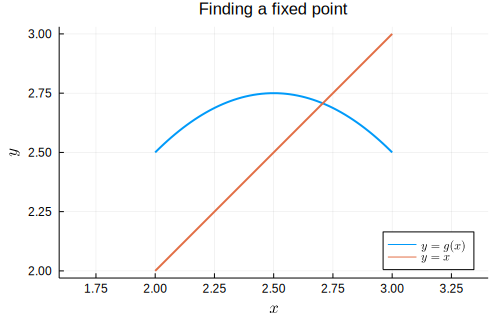

In [4]:
plt = plot([g x->x],2,3,l=2,label=[L"y=g(x)" L"y=x"],
    xlabel=L"x",ylabel=L"y",aspect_ratio=1,
    title="Finding a fixed point",legend=:bottomright)

If we evaluate $g(2.1)$, we get a value of almost 2.6, so this is not a fixed point.

In [5]:
x = 2.1;
y = g(x)

2.59

However, $y=g(x)$ is considerably closer to the fixed point at around 2.7 than $x$ is. Suppose then that we adopt $y$ as our new $x$ value. Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

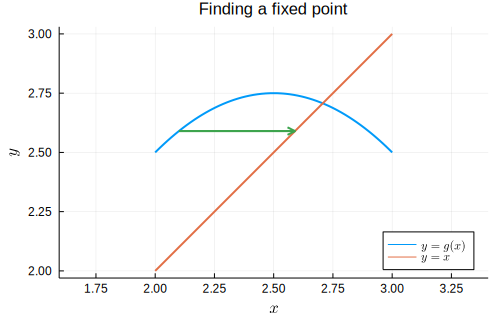

In [6]:
plot!([x,y],[y,y],arrow=true,color=3)

Now we can compute a new value for $y$. We leave $x$ alone here, so we travel along a vertical line to the graph of $g$.

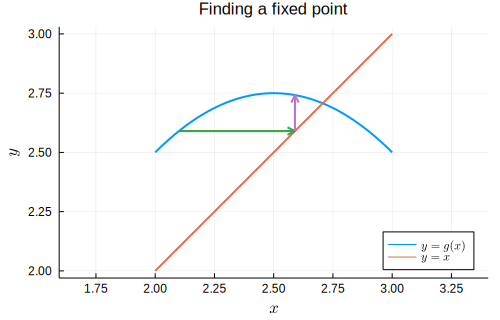

In [7]:
x = y;  y = g(x)
plot!([x,x],[x,y],arrow=true,color=4)

You see that we are in a position to repeat these steps as often as we like. Let's apply them a few times and see the result.

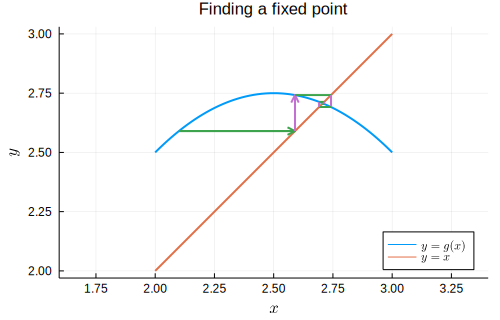

In [8]:
for k = 1:5
    plot!([x,y],[y,y],color=3);  
    x = y       # y becomes the new x
    y = g(x)    # g(x) becomes the new y
    plot!([x,x],[x,y],color=4)  
end
plt

The process spirals in beautifully toward the fixed point we seek. Our last estimate has almost 4 accurate digits.

In [9]:
abs(y-rmax)/rmax

0.0001653094344995643

Now let's try to find the other fixed point $\approx 1.29$ in the same way. We'll use 1.3 as a starting approximation.

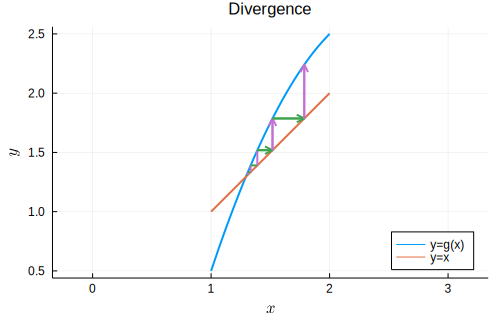

In [10]:
plt = plot([g x->x],1,2,l=2,label=["y=g(x)" "y=x"],aspect_ratio=1,
    xlabel=L"x",ylabel=L"y",title="Divergence",legend=:bottomright)

x = 1.3; y = g(x);
arrow = false
for k = 1:5
    plot!([x,y],[y,y],arrow=arrow,color=3)  
    x = y       # y --> new x
    y = g(x)    # g(x) --> new y
    plot!([x,x],[x,y],arrow=arrow,color=4)
    if k > 2; arrow = true; end
end
plt

This time, the iteration is pushing us _away from_ the correct answer.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Series analysis

In {numref}`Demo %s <demo-fp-spiral>`, the two computed iterations differ only in the choice of $x_1$. In the first case we evidently generated a sequence that converged to one of the fixed points. In the second case, however, the generated sequence diverged.[^finsample] The easiest way to uncover the essential difference between the two cases is to use a Taylor series expansion.

[^finsample]: We can only ever generate a finite sample from an infinite sequence, which in principle does not guarantee anything whatsoever about the limit or divergence of that sequence. However, in practical computing one usually assumes that well-established trends in the sequence will continue, and we complement observed experience with rigorous theory where possible.

Suppose a fixed point $p$ is the desired limit of an iteration $x_1,x_2,\ldots$. It's often easier to express quantities in terms of the error sequence $\epsilon_1,\epsilon_2,\ldots,$ where $\epsilon_k=x_k-p$. Starting from {eq}`fixedpointiter`, we have

```{math}
\begin{split}
  \epsilon_{k+1}+p = g( \epsilon_{k}+p ) = g(p) + g'(p) \epsilon_k + \frac{1}{2}g''(p) \epsilon_k^2 + \cdots,
\end{split}
```

assuming that $g$ has at least two continuous derivatives. But by definition, $g(p)=p$, so

```{math}
  :label: fpconverge
  \epsilon_{k+1} = g'(p) \epsilon_k + O(\epsilon_k^2).
```

If the iteration is to converge to $p$, the errors must approach zero. In this case we can neglect the second-order term and conclude that $\epsilon_{k+1} \approx g'(p) \epsilon_k$. This is consistent with convergence if $|g'(p)|<1$. However, if $|g'(p)| >1$, we are led to the conclusion that the errors must grow, not vanish, even if they start quite small.

```{proof:observation}
Fixed point iteration for a differentiable $g(x)$ converges to a fixed point $p$ if the initial error is sufficiently small and $|g'(p)|< 1$. The iteration diverges for all initial values if $|g'(p)| > 1$.
```

(example-fprate)=
````{proof:example}
The role of $g'(p)$ is clear in {numref}`Demo %s <demo-fp-spiral>`. We have $g(x) = -x^2+5x-3.5$ and $g'(x)=-2x+5$. For the first fixed point, near $2.71$, we get $g'(p)\approx-0.42$, indicating convergence. For the second fixed point, near 1.29, we get $g'(p)\approx 2.42$, which is consistent with the observed divergence.
````

## Linear convergence

In computation we usually want to know not just whether an iteration converges but also the rate at which convergence occurs, i.e., how quickly the errors approach zero. Other things being equal, faster convergence is preferred to slower convergence, as it usually implies that the computation will take less time to achieve a desired accuracy.

The prediction of the series analysis above is that if the fixed point iteration converges, the errors approximately satisfy $|\epsilon_{k+1}| = \sigma|\epsilon_k|$, for $\sigma = |g'(p)| < 1$. This is a well-known type of convergence.

```{index} ! convergence rate; linear, ! linear convergence
```

````{proof:definition} Linear convergence
Suppose a sequence $x_k$ approaches limit $x^*$. If the error sequence $\epsilon_k=x_k - x^*$ satisfies

```{math}
  :label: linearconvergence
  \lim_{k\to\infty} \frac{|\epsilon_{k+1}|}{|\epsilon_k|} = \sigma < 1,
```

then the sequence displays **linear convergence**. The number $\sigma$ is called the **convergence rate**.
````

If we suppose that the ratios in {eq}`linearconvergence` all equal $\sigma$ (i.e., perfect linear convergence), then $|\epsilon_k| = C \sigma^k$. Taking logs, we get

```{math}
  \log |\epsilon_k| = k(\log \sigma) + (\log C).
```

This is in the form $\log |\epsilon_k| = \alpha k + \beta$, which is a linear relationship.

```{proof:observation} Linear convergence in practice
Linear convergence is marked by an approximate reduction of the error at each iteration by a constant factor, the convergence rate $\sigma$. When graphed on a log-linear scale, the errors lie on a straight line whose slope is the log of the convergence rate. Both phenomena manifest most strongly at the latest iterations.
```

(demo-fp-converge)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We revisit {numref}`Demo %s <demo-fp-spiral>` and investigate the observed convergence more closely. Recall that above we calculated $g'(p)\approx-0.42$ at the convergent fixed point.

In [11]:
p = Polynomial([3.5,-4,1])
r = roots(p)
rmin,rmax = extrema(r)
@show rmin,rmax;

(rmin, rmax) = (1.2928932188134525, 2.7071067811865475)


Here is the fixed point iteration. This time we keep track of the whole sequence of approximations.

:::{index} Julia; push!
:::

In [12]:
g = x -> x - p(x)
x = [2.1] 
for k = 1:12
    push!(x,g(x[k]))
end
x

13-element Vector{Float64}:
 2.1
 2.59
 2.7419000000000002
 2.69148439
 2.713333728386328
 2.7044887203327885
 2.7081843632566587
 2.7066592708954196
 2.7072919457529734
 2.7070300492259465
 2.707138558717502
 2.707093617492436
 2.7071122335938966

It's illuminating to construct and plot the sequence of errors.

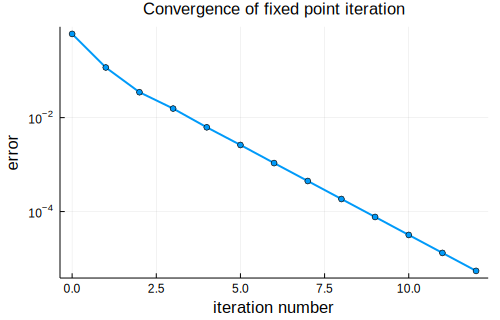

In [13]:
err = @. abs(x - rmax)
plot(0:12,err,m=:o,
    xaxis=("iteration number"),yaxis=("error",:log10),
    title="Convergence of fixed point iteration")

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [14]:
y = log.(err[5:12])
p = Polynomials.fit(5:12,y,1)

Polynomial(-0.6680573888302085 - 0.8807181589734454*x)

We can exponentiate the slope to get the convergence constant $\sigma$.

In [15]:
σ = exp(p.coeffs[2])

0.4144851385485473

The error should therefore decrease by a factor of $\sigma$ at each iteration. We can check this easily from the observed data.

In [16]:
[ err[i+1]/err[i] for i in 8:11 ]

4-element Vector{Float64}:
 0.4137660520817109
 0.4143987269383
 0.4141368304124451
 0.4142453399049934

The methods for finding $\sigma$ agree well.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Contraction maps

The convergence condition $\sigma=|g'(p)|<1$ derived by series expansion is a special case of a more general condition.

```{index} ! Lipschitz condition
```

````{proof:definition}
A function $g$ is said to satisfy a **Lipschitz condition** with constant $L$ on the interval $S\subset\mathbb{R}$ if, for all $s,t\in S$, 
  
```{math}
    :label: lipschitz
    \bigl| g(s)-g(t) \bigr| \le L \bigl| s-t \bigr|.
```
````

```{index} ! contraction mapping
```

It can be shown that a function satisfying {eq}`lipschitz` is continuous in $S$. If $L<1$, we call $g$ a **contraction mapping** because distances between points all decrease after an application of $g$. This situation leads to a major result about fixed points.

(theorem-contraction)=
````{proof:theorem} Contraction mapping
Suppose that $g$ satisfies {eq}`lipschitz` with $L<1$ on an interval $S$. Then $S$ contains exactly one fixed point $p$ of $g$. If $x_1,x_2,\ldots$ are generated by the fixed point iteration {eq}`fixedpointiter`, and $x_1,x_2,\ldots$ all lie in $S$, then $|x_k-p|\le L^{k-1} |x_1-p|$ for all $k>1$.
````

````{proof:proof}
(partial proof)  First we show there is at most one fixed point in $S$. Suppose $g(t)=t$ and $g(s)=s$ in $S$. Then by {eq}`lipschitz`, $|s-t|=|g(s)-g(t)|\le L|s-t|$, which for $L<1$ is possible only if $|s-t|=0$, so $s=t$.

Now suppose that for some $p\in S$, $g(p)=p$. By the definition of the fixed point iteration and the Lipschitz condition,
  
```{math}
|x_{k+1} - p | = |g(x_k) - g(p)| \le L |x_k-p|,
```

which shows that $x_k\to p$ as $k\to \infty$. To show that $p$ must exist and complete the proof, one needs to apply the Cauchy theory of convergence of a sequence, which is beyond the scope of this text.
````

From the Fundamental Theorem of Calculus, which asserts that $g(s)-g(t)=\int_s^t g'(x)\, dx$, it's easy to conclude that an upper bound of $|g'(x)|\le L$ for all $x$ results in {eq}`lipschitz`. Hence:

::::{proof:corollary}
If $|g'(x)|\le L < 1$ for all $x$ in an interval $S$, then the conclusions of {numref}`Theorem {number} <theorem-contraction>` apply.
::::

There are stronger and more general statements of {numref}`Theorem %s <theorem-contraction>`. For instance, it's possible to show that all initial $x_1$ that are sufficiently close to the fixed point will lead to convergence of the iteration. Algorithmically the main virtue of the fixed point iteration is that it is incredibly easy to apply. However, as we are about to discover, it's far from the fastest option.

## Exercises

(problem-fixedpoint-simple)=

1. ✍ In each case, show that the given $g(x)$ has a fixed point at the given $p$ and use {eq}`fpconverge` to show that fixed point iteration can converge to it.
  
    **(a)** $g(x) = 1 + x - \frac{1}{9}x^2$, $p=3$

    **(b)** $g(x) = \pi + \frac{1}{4}\sin(x)$, $p=\pi$

    **(c)** $g(x) = x+1-\tan(x/4)$, $p=\pi$

2. ⌨ For each case in the preceding problem, apply 25 fixed point iterations and use a log-linear graph of the error to verify linear convergence. Then use numerical values of the error to determine an approximate value for $\sigma$ in {eq}`linearconvergence`.

3. ✍  In each case, show that the given $g(x)$ has a fixed point at the given $p$. Then determine analytically whether the fixed point iteration could converge to that point given a close enough starting value.
  
    **(a)** $g(x) = 3+x-x^2$, $p=\sqrt{3}$

    **(b)** $g(x) = \sqrt{1+x}$, $p=(1+\sqrt{5})/2$

    **(c)** $g(x) = -\sqrt{1+x}$, $p=(1-\sqrt{5})/2$

    **(d)** $g(x) = x+1-\tan(\pi x)$, $p=1/4$
  
4. In {numref}`Demo %s <demo-fp-spiral>` we defined $g(x)=x-f(x)$ to find a fixed point of the polynomial $f(x)=x^2 - 4x + 3.5$.
  
    **(a)** ✍ Why does the iteration spiral in to the fixed point, instead of approaching it monotonically? (Refer to the series analysis.)

    **(b)** ✍ Show that if $\hat{g}(x) = (x^2+3.5)/4$, then any fixed point of $\hat{g}$ is a root of $f$.

    **(c)** ⌨ Use fixed point iteration on $\hat{g}$ to try to find both roots of $f$, and note which case(s), if either, converge.

    **(d)** ✍ Use {eq}`fpconverge` to explain the success/failure in part (c) for each fixed point.
  
5. ✍ The $m$th root of a positive real number $a$ is a fixed point of the function
  
    ```{math}
    g(x) = \frac{a}{x^{m-1}}.
    ```

    For what integer values of $m>1$ will the fixed point iteration for $g$ converge (for close enough initial guesses)?

6. **(a)** ✍ Show that $p=1/3$ is a fixed point of $g(x) = 2x-3x^2$.

    **(b)** ✍ Find $g'(1/3)$. How does this affect {eq}`fpconverge`?

    **(c)** ⌨ Do an experiment with fixed point iteration on $g$ to converge to $p=1/3$. Is the convergence a straight line on a log-linear plot?
  
7. ✍  Consider the iteration
  
    ```{math}
    x_{k+1} = x_k - \frac{f(x_k)}{c}, \qquad k=0,1,\ldots.
    ```

    Suppose $f(p)=0$ and that $f'(p)>0$ exists. Find one or more conditions on $c$ such that the iteration converges to $p$.